## 현재 위치에 따른 광역시도 주유소 가격 정보 얻어오기
- opinet 사이트에서 제공하는 excel파일 자동 다운 프로그램
- https://www.opinet.co.kr/user/main/mainView.do

In [1]:
#필요 패키지 임포트
import selenium
from selenium import webdriver
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
from selenium.webdriver.common.by import By

In [2]:
url='https://www.opinet.co.kr/user/main/mainView.do'

In [3]:
driver = webdriver.Chrome('./driver/chromedriver')
driver.get(url)

<ipython-input-3-5f90823d277e>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./driver/chromedriver')


In [4]:
# 싼 주유소 찾기 - 지역별 메뉴 추출
xpath = '//*[@id="header"]/div/ul/li[1]/ul/li[1]/a'
menu = driver.find_element(By.XPATH,xpath)
# 지역(a태그)메뉴 클릭
# 스크립트 동작(js click()) # 자바스크립트 클릭함수
driver.execute_script("arguments[0].click();",menu)

In [7]:
gu_list_raw = driver.find_element(By.XPATH, '//*[@id="SIGUNGU_NM0"]')
gu_list_raw

<selenium.webdriver.remote.webelement.WebElement (session="4cebfd0b775f5e04e8fdfe88050f3e46", element="b1eb73ca-9342-41e9-b8b2-f5fd8eb4a513")>

In [9]:
# select tag 내의 option태그 추출
gu_list = gu_list_raw.find_elements(By.TAG_NAME,'option')

In [11]:
# 구 리스트 추출
# option 태그의 value 속성의 값을 추출
gu_name = [option.get_attribute('value') for option in gu_list]
gu_name.remove('')
gu_name

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [13]:
# 시군구명을 추출한 이유
# 해당 시군구명을 객체로 전송해서 정보를 변경(select 태그의 potion 정보 변경)
sigungu_sel = driver.find_element(By.ID,'SIGUNGU_NM0')
sigungu_sel.send_keys(gu_name[11])

In [14]:
# 조회버튼 클릭 : 조회버튼의 xpath 찾아서
xpath = '//*[@id="searRgSelect"]'
sel_btn = driver.find_element(By.XPATH,xpath)
sel_btn.click()

In [15]:
# 엑셀 저장 버튼 클릭
xpath = '//*[@id="glopopd_excel"]'
excel_btn = driver.find_element(By.XPATH,xpath)
excel_btn.click()

In [16]:
driver.close()

### 다운 코드 정리

In [17]:
gu_name

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [18]:
driver = webdriver.Chrome('./driver/chromedriver')

<ipython-input-18-278a11c4190b>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./driver/chromedriver')


In [19]:
url='https://www.opinet.co.kr/user/main/mainView.do'
driver.get(url)
# 화면이 출력되는걸 확인하고 다음 코드 진행해야 함

In [21]:
# 싼주유소찾기-지역별 메뉴  추출
# xpath='//*[@id="header"]/div/ul/li[1]/ul/li[1]/a'
xpath='//*[@id="header"]/div/ul/li[1]/ul/li[1]/a'
menu = driver.find_element(By.XPATH,xpath)
# 추출한 메뉴 스크립트 동작
driver.execute_script("arguments[0].click();",menu)

In [22]:
from tqdm import tqdm_notebook
#반복작업의 진행정도를 진행바로 표시해주는 함수
import time
# 다운 간격을 주기 위해서 사용할 시간 관련 함수 패키지

In [23]:
for gu in tqdm_notebook(gu_name) :
    # 셀렉트 박스의 구 이름을 변경
    sigungu_sel = driver.find_element(By.ID,'SIGUNGU_NM0')
    sigungu_sel.send_keys(gu)
    time.sleep(3)
    
    # 조회 버튼 클릭
    xpath = '//*[@id="searRgSelect"]'
    sel_btn = driver.find_element(By.XPATH,xpath)
    sel_btn.click()
    time.sleep(3)
    
    # 엑셀저장버튼 클릭
    x_path='//*[@id="glopopd_excel"]'
    excel_btn = driver.find_element(By.XPATH,x_path)
    excel_btn.click()
    time.sleep(1)

<ipython-input-23-62d8d8d6d9d4>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_name) :


## 외부 파일 읽어오기
- 이름이 비슷한 같은 형식의 파일 여러개 있을때 한번에 읽어오는 방법
- 관련 패키지 : glob
    - 파일 경로 및 이름을 모아서 리스트에 저장
    - * 문자 사용 가능
    - ex. 주유소*.xlsx (주유소로 시작하는 모든 xlsx 파일)


In [24]:
from glob import glob

In [25]:
# 지정된 디렉터리내의 특정 문자열을 포함하는 파일들의 파일명을 리스트로 반환
f = glob('./crawl_data/지역_위치별*.xls')

In [26]:
f

['./crawl_data\\지역_위치별(주유소) (1).xls',
 './crawl_data\\지역_위치별(주유소) (10).xls',
 './crawl_data\\지역_위치별(주유소) (11).xls',
 './crawl_data\\지역_위치별(주유소) (12).xls',
 './crawl_data\\지역_위치별(주유소) (13).xls',
 './crawl_data\\지역_위치별(주유소) (14).xls',
 './crawl_data\\지역_위치별(주유소) (15).xls',
 './crawl_data\\지역_위치별(주유소) (16).xls',
 './crawl_data\\지역_위치별(주유소) (17).xls',
 './crawl_data\\지역_위치별(주유소) (18).xls',
 './crawl_data\\지역_위치별(주유소) (19).xls',
 './crawl_data\\지역_위치별(주유소) (2).xls',
 './crawl_data\\지역_위치별(주유소) (20).xls',
 './crawl_data\\지역_위치별(주유소) (21).xls',
 './crawl_data\\지역_위치별(주유소) (22).xls',
 './crawl_data\\지역_위치별(주유소) (23).xls',
 './crawl_data\\지역_위치별(주유소) (24).xls',
 './crawl_data\\지역_위치별(주유소) (3).xls',
 './crawl_data\\지역_위치별(주유소) (4).xls',
 './crawl_data\\지역_위치별(주유소) (5).xls',
 './crawl_data\\지역_위치별(주유소) (6).xls',
 './crawl_data\\지역_위치별(주유소) (7).xls',
 './crawl_data\\지역_위치별(주유소) (8).xls',
 './crawl_data\\지역_위치별(주유소) (9).xls',
 './crawl_data\\지역_위치별(주유소).xls']

In [27]:
pd.read_excel(f[0],header=2).head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1892,1972,-
1,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1925,2016,-
2,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1935,1987,-
3,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1945,2025,1700
4,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,2218,1993,1991,-


In [28]:
tmp_raw = []

for f_name in f :
    tmp = pd.read_excel(f_name,header=2)
    tmp_raw.append(tmp)

In [29]:
tmp_raw

[       지역                    상호                            주소      상표  \
 0   서울특별시  재건에너지 재정제2주유소 고속셀프지점  서울특별시 강동구  천호대로 1246 (둔촌제2동)  현대오일뱅크   
 1   서울특별시        지에스칼텍스㈜ 동서울주유소        서울 강동구 천호대로 1456 (상일동)   GS칼텍스   
 2   서울특별시                구천면주유소         서울 강동구 구천면로 357 (암사동)  현대오일뱅크   
 3   서울특별시               방아다리주유소          서울 강동구 동남로 811 (명일동)   SK에너지   
 4   서울특별시     현대오일뱅크㈜직영 명일셀프주유소          서울 강동구 고덕로 168 (명일동)  현대오일뱅크   
 5   서울특별시              sk해뜨는주유소         서울 강동구  상일로 132 (강일동)   SK에너지   
 6   서울특별시        (주)소모에너지 신월주유소        서울 강동구 양재대로 1323 (성내동)   GS칼텍스   
 7   서울특별시          대성석유(주)길동주유소              서울 강동구 천호대로 1168   GS칼텍스   
 8   서울특별시        (주)삼표에너지 고덕주유소           서울 강동구 고덕로 39 (암사동)   GS칼텍스   
 9   서울특별시      주)지유에너지직영 오렌지주유소          서울 강동구 성안로 102 (성내동)   SK에너지   
 10  서울특별시       (주)퍼스트오일 코알라주유소     서울특별시 강동구  올림픽로 556 (성내동)   S-OIL   
 11  서울특별시        (주)소모에너지 성내주유소         서울 강동구 올림픽로 578 (성내동)   GS칼텍스   
 12  서울특별시               천호현대주유소      

In [30]:
station_raw = pd.concat(tmp_raw)

In [33]:
station_raw.shape
station_raw.tail()
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1892,1972,-
1,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1925,2016,-
2,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1935,1987,-
3,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1945,2025,1700
4,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,2218,1993,1991,-


### 휘발유 가격은 셀프주유소가 싼가?

In [34]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 0 to 33
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      454 non-null    object
 1   상호      454 non-null    object
 2   주소      454 non-null    object
 3   상표      454 non-null    object
 4   전화번호    454 non-null    object
 5   셀프여부    454 non-null    object
 6   고급휘발유   454 non-null    object
 7   휘발유     454 non-null    object
 8   경유      454 non-null    object
 9   실내등유    454 non-null    object
dtypes: object(10)
memory usage: 39.0+ KB


In [35]:
station = pd.DataFrame({'주유소':station_raw['상호'],
                        '주소': station_raw['주소'],
                        '가격': station_raw['휘발유'],
                        '셀프': station_raw['셀프여부'],
                        '상표': station_raw['상표']})

In [36]:
station.head()

,주유소,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1892,Y,현대오일뱅크
1,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1925,Y,GS칼텍스
2,구천면주유소,서울 강동구 구천면로 357 (암사동),1935,N,현대오일뱅크
3,방아다리주유소,서울 강동구 동남로 811 (명일동),1945,Y,SK에너지
4,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1993,Y,현대오일뱅크


In [37]:
# 구별 가공데이터를 생성하기 위해 변수 추가
station['구']=[addr.split()[1] for addr in station['주소']]

In [39]:
station.head()
station.tail()

,주유소,주소,가격,셀프,상표,구
29,제이제이주유소,서울 강남구 언주로 716,2398,N,현대오일뱅크,강남구
30,대청주유소,서울 강남구 개포로 654 (일원동),2399,N,SK에너지,강남구
31,갤러리아주유소,서울 강남구 압구정로 426,2508,N,SK에너지,강남구
32,SK논현주유소,서울 강남구 논현로 747 (논현동),2541,N,SK에너지,강남구
33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스,강남구


In [43]:
# 가격이 없는 주유소 제외
station_fin = station[station['가격'] != '-']

In [51]:
station_fin.count()

index    446
주유소      446
주소       446
가격       446
셀프       446
상표       446
구        446
dtype: int64

In [45]:
# index 설정
station_fin.reset_index(inplace=True)

In [47]:
station_fin.tail()

,index,주유소,주소,가격,셀프,상표,구
441,29,제이제이주유소,서울 강남구 언주로 716,2398,N,현대오일뱅크,강남구
442,30,대청주유소,서울 강남구 개포로 654 (일원동),2399,N,SK에너지,강남구
443,31,갤러리아주유소,서울 강남구 압구정로 426,2508,N,SK에너지,강남구
444,32,SK논현주유소,서울 강남구 논현로 747 (논현동),2541,N,SK에너지,강남구
445,33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스,강남구


In [49]:
# 가격이 문자열형이어서 실수형으로 변경
station_fin['가격'] = [float(price) for price in station_fin['가격']]

<ipython-input-49-091f581e3360>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_fin['가격'] = [float(price) for price in station_fin['가격']]


In [50]:
station_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   446 non-null    int64  
 1   주유소     446 non-null    object 
 2   주소      446 non-null    object 
 3   가격      446 non-null    float64
 4   셀프      446 non-null    object 
 5   상표      446 non-null    object 
 6   구       446 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 24.5+ KB


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [53]:
station_fin.셀프

0      Y
1      Y
2      N
3      Y
4      Y
      ..
441    N
442    N
443    N
444    N
445    N
Name: 셀프, Length: 446, dtype: object

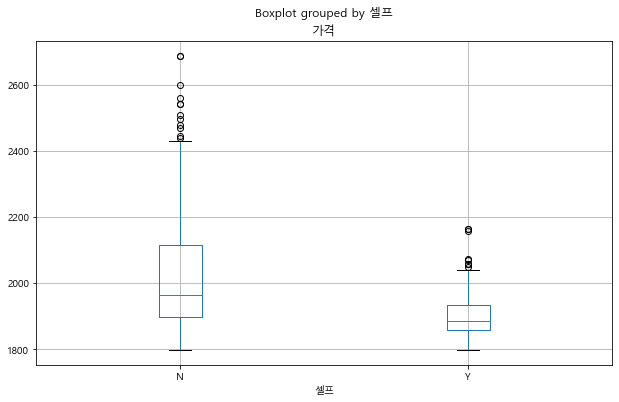

In [55]:
station_fin.boxplot(column='가격', by='셀프', figsize=(10,6))

In [56]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [57]:
# 휘발유 가격이 비싼 10개 주유소
station_fin.sort_values(by='가격', ascending=False).head(10)

,index,주유소,주소,가격,셀프,상표,구
277,9,서남주유소,서울 중구 통일로 30,2687.0,N,SK에너지,중구
243,12,서계주유소,서울특별시 용산구 청파로 367 (청파동),2685.0,N,GS칼텍스,용산구
445,33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구
276,8,필동주유소,서울 중구 퇴계로 196 (필동2가),2559.0,N,GS칼텍스,중구
444,32,SK논현주유소,서울 강남구 논현로 747 (논현동),2541.0,N,SK에너지,강남구
369,18,구로주유소,서울 구로구 구로동로 137 (구로동),2540.0,N,GS칼텍스,구로구
443,31,갤러리아주유소,서울 강남구 압구정로 426,2508.0,N,SK에너지,강남구
97,29,양재최고주유소,서울 서초구 매헌로 72 (양재동),2495.0,N,S-OIL,서초구
267,7,SK북악주유소,서울 종로구 평창문화로 137,2478.0,N,SK에너지,종로구
275,7,약수주유소,서울 중구 다산로 173,2468.0,N,GS칼텍스,중구


In [58]:
# 휘발유 가격이 싼 10개 주유소
station_fin.sort_values(by='가격', ascending=True).head(10)

,index,주유소,주소,가격,셀프,상표,구
291,0,스카이주유소,서울 강서구 개화동로 457 (방화동),1797.0,Y,S-OIL,강서구
293,2,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1799.0,N,알뜰주유소,강서구
292,1,화곡역주유소,서울 강서구 강서로 154 (화곡동),1799.0,Y,알뜰주유소,강서구
295,4,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1799.0,Y,현대오일뱅크,강서구
167,0,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1799.0,Y,SK에너지,양천구
168,1,형산석유(주)원주유소,서울 양천구 남부순환로 408,1799.0,N,현대오일뱅크,양천구
294,3,목화주유소,서울 강서구 국회대로 251 (화곡동),1799.0,Y,알뜰주유소,강서구
170,3,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1799.0,N,SK에너지,양천구
171,4,양천구주유소,서울 양천구 국회대로 275 (목동),1799.0,Y,알뜰주유소,양천구
169,2,현대주유소,서울 양천구 남부순환로 372 (신월동),1799.0,Y,S-OIL,양천구


## 서울시 구별 주유가격 단계 구분도

In [59]:
import json
import folium

C:\ProgramData\Anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [63]:
geo_path='../ch05_data/data/02. skorea_municipalities_geo_simple.json'

In [ ]:
# 구별 주유가격 평균표 생성
gu_data = pd.pivot_table(station_fin,index=['구'],values=['가격'],aggfunc=np.mean)
gu_data

### 파이썬 단계구분도
- folium 패키지의 choropleth() 사용
1. folium.Map(location=[중심위치 위경도], zoom_start=초기 zoom 비율, tiles=지도 형태)함수를 이용해 기본 지도 생성
2. 기본 지도 위에 단계 구분도를 추가
    - choropleth(geo_data=경계위경도가 포함된 json파일,data, columns,fill_color,key_on=)

In [64]:
# geo_data 불러오기
geo_str = json.load(open(geo_path,encoding='utf-8'))
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [67]:
map = folium.Map(location=[37.5502,126.982],
                zoom_start=10.5,
                tiles='Stamen Toner')

In [68]:
map.choropleth(geo_data=geo_str,
              data=gu_data,
              columns=[gu_data.index,'가격'],
              fill_color='YlGnBu',
              key_on='feature.id')

In [69]:
map